In [1]:
import os
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata

In [2]:
# Open LUH2 original dataset
fpath = 'C:/Users/sshu3/anaconda_wkspace/transitions.nc'
nclu=NetCDFFile(fpath,'r')
primf_bioh = nclu.variables['primf_bioh'][:]
# primf_harv = nclu.variables['primf_harv'][:]
primn_bioh = nclu.variables['primn_bioh'][:]
# primn_harv = nclu.variables['primn_harv'][:]
secmf_bioh = nclu.variables['secmf_bioh'][:]
# secmf_harv = nclu.variables['secmf_harv'][:]
secmn_bioh = nclu.variables['secnf_bioh'][:]
# secmn_harv = nclu.variables['secnf_harv'][:]

nclu.close()


In [4]:
nlon = 1440
nlat = 720
grid_area = np.ones((nlat, nlon))*-9999.
earth_area =  5.096e14;
lat = np.arange(-89.875, 90.125, 0.25)
res = 0.25;
for i in np.arange(0,nlat):
    for j in np.arange(0,nlon):
        grid_area[i,j] = (earth_area/2)*abs(np.sin((lat[i] - res/2)*np.pi/180) -
                    np.sin((lat[i] + res/2)*np.pi/180))/(360/res)

In [6]:
np.shape(primf_bioh)

(1165L, 720L, 1440L)

In [8]:
# Mask
primf_bioh[primf_bioh>1e16] = np.float('nan')
primn_bioh[primn_bioh>1e16] = np.float('nan')
secmf_bioh[secmf_bioh>1e16] = np.float('nan')
secmn_bioh[secmn_bioh>1e16] = np.float('nan')

C:\Users\sshu3\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [10]:
# Calculate the total primary forest harvest, non-forest harvest and secondary forest harvest, non-forest harvest
primf_bioh_tot = np.nansum(np.nansum(primf_bioh, 1), 1)/1e12
primn_bioh_tot = np.nansum(np.nansum(primn_bioh, 1), 1)/1e12
secmf_bioh_tot = np.nansum(np.nansum(secmf_bioh, 1), 1)/1e12
secmn_bioh_tot = np.nansum(np.nansum(secmn_bioh, 1), 1)/1e12

Text(0,0.5,'Total harvested C (PgC yr-1)')

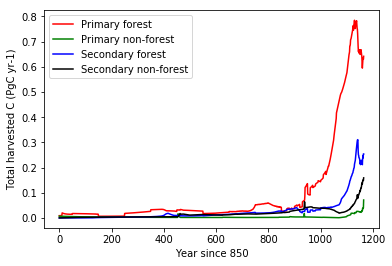

In [11]:
# Plots
plt.plot(primf_bioh_tot, 'r-')
plt.plot(primn_bioh_tot, 'g-')
plt.plot(secmf_bioh_tot, 'b-')
plt.plot(secmn_bioh_tot, 'k-')
plt.legend(['Primary forest','Primary non-forest', 'Secondary forest', 'Secondary non-forest'])
plt.xlabel('Year since 850')
plt.ylabel('Total harvested C (PgC yr-1)')


Text(0,0.5,'Ratio')

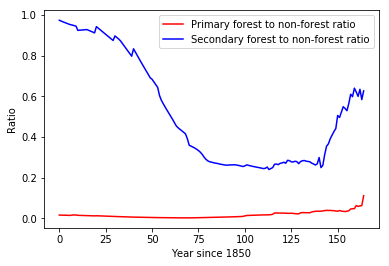

In [13]:
# Relative ratio
plt.plot(primn_bioh_tot[1000:1165]/primf_bioh_tot[1000:1165], 'r-')
plt.plot(secmn_bioh_tot[1000:1165]/secmf_bioh_tot[1000:1165], 'b-')
plt.legend(['Primary forest to non-forest ratio', 'Secondary forest to non-forest ratio'])
plt.xlabel('Year since 1850')
plt.ylabel('Ratio')


In [22]:
# Open data
# Time series for ELM 0.5 x 0.5 deg
nclu=NetCDFFile('landuse.timeseries_ne30np4_hist_simyr1850_2015_c20171018.nc','r')
ncvar_area = nclu.variables['AREA'][:]
ncvar_land = nclu.variables['LANDFRAC_PFT'][:]
ncvar_pft = nclu.variables['PCT_NAT_PFT'][:]
latnc = nclu.variables['LATIXY'][:]
lonnc = nclu.variables['LONGXY'][:]
nclu.close()

area_halfxhalf = ncvar_area
land_halfxhalf = ncvar_land
pft_halfxhalf = ncvar_pft
lat_halfxhalf = latnc
lat_halfxhalf = lonnc

# Time series for ELM 4 x 5 deg
# Time series for ELM 0.5 x 0.5 deg
nclu=NetCDFFile('landuse.timeseries_4x5_hist_simyr1850-2015_c11105.nc','r')
ncvar_area = nclu.variables['AREA'][:]
ncvar_land = nclu.variables['LANDFRAC_PFT'][:]
ncvar_pft = nclu.variables['PCT_NAT_PFT'][:]
latnc = nclu.variables['LATIXY'][:]
lonnc = nclu.variables['LONGXY'][:]
nclu.close()

area_4x5 = ncvar_area
land_4x5 = ncvar_land
pft_4x5 = ncvar_pft
lat_4x5 = latnc
lat_4x5 = lonnc

# Comparison: areas of different PFTs, Unit in Mkm2
nyear = int(np.shape(ncvar_pft)[0])
npft = int(np.shape(ncvar_pft)[1])
totalarea_hxh = np.zeros((nyear, npft))
totalarea_4x5 = np.zeros((nyear, npft))
# Get the total area for each PFT
for iyear in np.arange(0,nyear):
    for ipft in np.arange(0,npft):
        areamap = area_halfxhalf * land_halfxhalf * pft_halfxhalf[iyear, ipft, :]
        sumarea_halfxhalf = np.nansum(np.nansum(areamap))/1e6
        totalarea_hxh[iyear, ipft] = sumarea_halfxhalf
        areamap = area_4x5 * land_4x5 * pft_4x5[iyear, ipft, :]      
        sumarea_4x5 = np.nansum(np.nansum(areamap))/1e6
        totalarea_4x5[iyear, ipft] = sumarea_4x5
        
#         print('Current pft', ipft, 'Current year', iyear, 'Area_hxh', sumarea_halfxhalf, 'Area_4x5', sumarea_4x5, \
#               'Area_diff', sumarea_halfxhalf-sumarea_4x5)

In [23]:
totalarea_hxh

array([[5539.63050589,  562.2989682 , 1073.11610107, ..., 1311.7035754 ,
         623.29864865,    0.        ],
       [5539.53445474,  561.22633716, 1072.67522803, ..., 1311.65175962,
         627.54946403,    0.        ],
       [5539.49227548,  560.24104621, 1072.23575692, ..., 1311.51681129,
         632.09966082,    0.        ],
       ...,
       [5513.16770064,  492.68005877, 1045.54542629, ..., 1272.64153121,
        1669.75888639,    0.        ],
       [5512.52738923,  492.83084462, 1045.56425547, ..., 1266.24061898,
        1688.98043256,    0.        ],
       [5512.52738923,  492.83084462, 1045.56425547, ..., 1266.24061898,
        1688.98043256,    0.        ]])

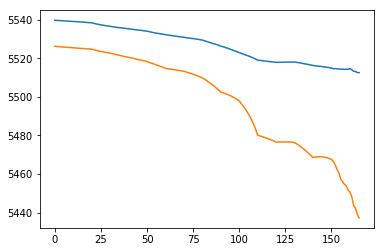

In [25]:
plt.plot(totalarea_hxh[:,0])
plt.plot(totalarea_4x5[:,0])